# Ability - Wealth Modelling

Ability like IQ can be modelled as a normal distribution, however, wealth in society follows a power law. Why is this the case? Suppose if outcomes are path dependent, with the state in previous steps influencing the later steps, will the final distribution follow a power law? This notebook seeks to model this. 

Results: Apparently, this is true. Oh wow!

In [36]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
import scipy.stats 

np.random.seed(0)

%matplotlib inline

## Initial Parameters

We have an initial population size of 1000. 

Consider Ability to be between 0-100 following a truncated normal distribution.

Consider Initial wealth to be 0. (To experiment with initial wealth distributions)

count    1000.000000
mean       50.107122
std        15.023995
min         3.198834
25%        39.757767
50%        50.513823
75%        60.384742
max        98.927976
Name: Ability, dtype: float64


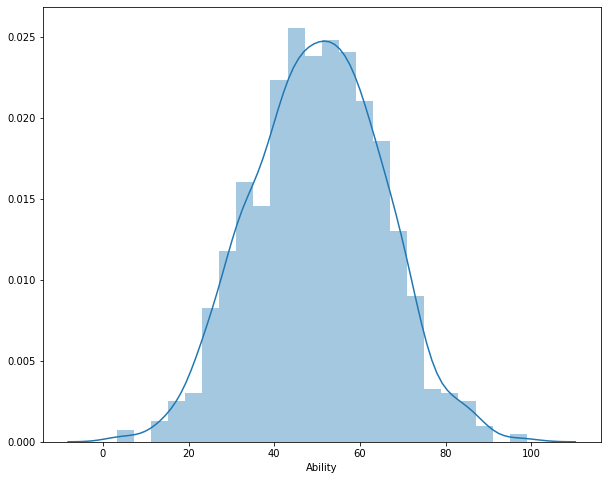

In [30]:
N = 1000

lower = 0
upper = 100
mu = 50
sigma = 15

ability = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

wealth = np.zeros(shape=(N))

pd_ability = pd.Series(ability, name="Ability")
print(pd_ability.describe())

plt.figure(figsize=(10,8))
sns.distplot(pd_ability)

## Transition Function
At every time period, conditioned upon given ability and current wealth the wealth goes up or down given some percentage chance

In [3]:
def trans_fn(wealth_el, ability_el):
    """
    Outputs new wealth
    """
    # take the simple average of wealth and ability / 100. 
    # This gives us the probability of going up
    avg_el = (wealth_el + ability_el) / 2
    probability = avg_el / 100
    
    if probability > np.random.rand():
        return wealth_el + 1
    else:
        if wealth_el > 0:
            return wealth_el - 1
        else:
            return 0
    

vtrans_fn = np.vectorize(trans_fn)

# Sanity Check
# print(wealth)
# new_wealth = vtrans_fn(wealth, ability)
# print(new_wealth)

## Test The Evolution of the System
We run the system for 100 epochs and see the way the wealth distribution evolves

In [4]:
results = []
epochs = 100


for i in range(epochs): 
    results.append(wealth)
    wealth = vtrans_fn(wealth, ability)

## Observe Final Wealth
We get a power law looking like distribution. Interesting !! This is for the case where all wealth starts at 0. There's a tendency for a agent with better ability to do well. But that is not enough either, the agent with max ability didn't have the max wealth. 

In [5]:
pd_wealth = pd.Series(wealth, name="Wealth")

pd_wealth.describe()

count    1000.000000
mean        0.712000
std         1.561888
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        25.000000
Name: Wealth, dtype: float64

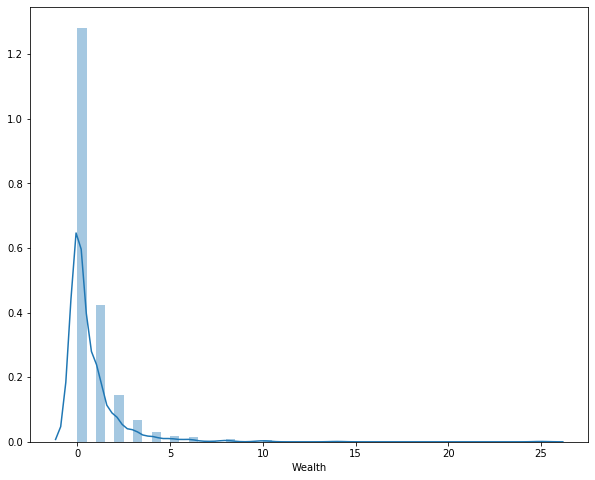

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(pd_wealth)

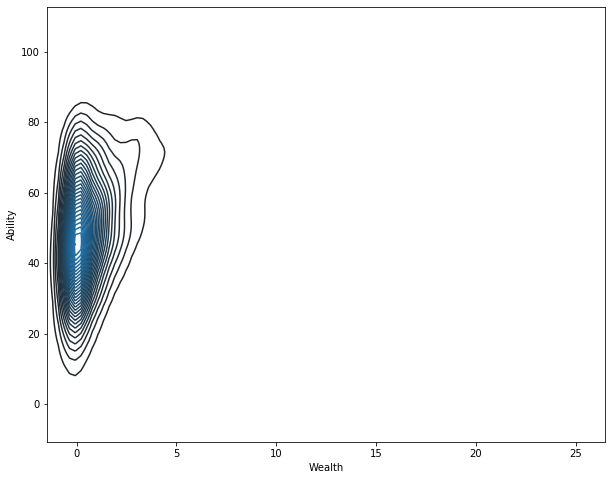

In [7]:
plt.figure(figsize=(10,8))
ax = sns.kdeplot(pd_wealth, pd_ability, n_levels=30)

In [25]:
wealth_ability = pd.concat([pd_wealth, pd_ability], axis=1)
wealth_ability

,Wealth,Ability
0,0,51.838377
1,0,58.520980
2,0,53.904165
3,0,51.689700
4,0,47.114225
...,...,...
995,0,30.606395
996,1,50.560715
997,1,73.077379
998,0,38.861865


## Agent with Maximum Ability and Wealth
The agent with maximum ability did pretty well considering and is well above the 75 percentile. Suggesting that ability does correlate with final wealth outcomes. However, it cannot tell you whether you will be the wealthiest.

The wealthiest agent has a pretty high ability too. It's very likely that the final wealth outcomes are dependent on luck.

In [10]:
# Max Ability
wealth_ability.iloc[wealth_ability['Ability'].idxmax()]

Wealth      7.000000
Ability    98.440539
Name: 974, dtype: float64

In [11]:
# Max Wealth
wealth_ability.iloc[wealth_ability['Wealth'].idxmax()]

Wealth     25.000000
Ability    87.661499
Name: 478, dtype: float64

## Agent with Minimum Ability and Wealth
Many agents with had an eventual wealth outcome of 0. You can have a decently high ability and end up with poor outcomes too. 

In [28]:
# Min Ability
wealth_ability.iloc[wealth_ability['Ability'].idxmin()]

Wealth     0.000000
Ability    3.531823
Name: 821, dtype: float64

In [12]:
# Min Wealth
wealth_ability.iloc[wealth_ability['Wealth'].idxmin()]

Wealth      0.000000
Ability    51.838377
Name: 0, dtype: float64

Apparently there are alot of 0 values for wealth. You can have very high ability and still have poor expected outcomes. **Big oof**

In [43]:
# Apparently there are alot of 0 values. Let's find the maximum ability given 0 wealth.
filtered = wealth_ability[wealth_ability['Wealth'] == 0]

max(filtered["Ability"])

83.83524493575716

## Todo: Do an animation to visualize the evolution of wealth over the epoch